In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [40]:
path = 'hillary-clinton-emails/Emails.csv'
data = pd.read_csv(path, sep=',')

In [41]:
data.ExtractedBodyText

0                                                     NaN
1       B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...
2                                                     Thx
3                                                     NaN
4       H <hrod17@clintonemail.com>\nFriday, March 11,...
5       Pis print.\n-•-...-^\nH < hrod17@clintonernail...
6                                                     NaN
7       H <hrod17@clintonemail.corn>\nFriday, March 11...
8                                                     FYI
9       B6\nWednesday, September 12, 2012 6:16 PM\nFwd...
10                                           Fyi\nB6\n— —
11      B6\nWednesday, September 12, 2012 6:16 PM\nFwd...
12                                                    Fyi
13      Anne-Marie Slaughter\nSunday, March 13, 2011 9...
14      _ .....\nFrom Randolph, Lawrence M\nSent: Wedn...
15      I asked to attend your svtc today with Embassy...
16                   Hope. See picture below Kamala sent.
17            

In [42]:
def getRawText():
    subjectData = data[data.ExtractedSubject.notnull()].ExtractedSubject.astype(str)
    bodyData = data[data.ExtractedBodyText.notnull()].ExtractedBodyText.astype(str)
    rawText = ' '.join(subjectData) + ' ' + ' '.join(bodyData)
    rawText = rawText.replace('\n', ' ')
    return rawText

## 1. Generate a word cloud based on the raw corpus 

### 1.1 Word cloud without preprocessing

In [43]:
rawText = getRawText()

In [44]:
wordcloud = WordCloud().generate(rawText)

(-0.5, 399.5, 199.5, -0.5)

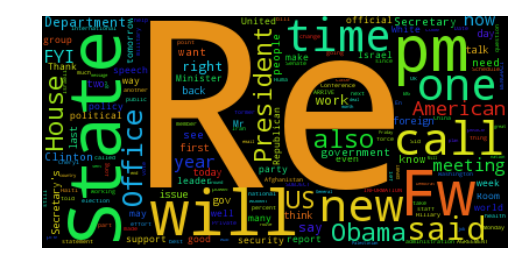

In [45]:
plt.imshow(wordcloud)
plt.axis("off")

### 1.2 Word cloud with preprocessing 

In [46]:
def filterStopWords(text):
    try:
        tokens = nltk.word_tokenize(text)
    except:
        nltk.download()
        tokens = nltk.word_tokenize(text)
    stopWords = stopwords.words('english')
    customWords = ['re','fw','pm','am', 'also', '.', ',', '"', "'", '?', '&','/'
                   '!', ':', ';', '(', ')', '[', ']', '{', '}', '@', '<', '>', '-', "n't"]
    stopWords += customWords
    filtered = list()
    for token in tokens:
        token = token.lower()
        if token not in stopWords:
            filtered.append(token)
    return filtered

#http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
def lemmAndStem(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    stemmer = nltk.SnowballStemmer("english", ignore_stopwords=True)
    stemmed = [stemmer.stem(lema) for lema in lemmatized]
    return stemmed

def preprocess(text):
    filtered = filterStopWords(text)
    processed = lemmAndStem(filtered)
    return ' '.join(processed)

In [47]:
procText = preprocess(rawText)

(-0.5, 399.5, 199.5, -0.5)

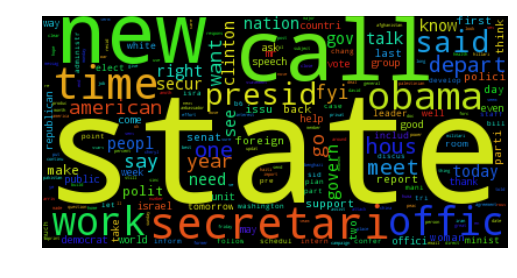

In [48]:
wordcloud = WordCloud().generate(procText)
plt.imshow(wordcloud)
plt.axis("off")

## 2. Sentiment Analysis

https://www.kaggle.com/operdeck/d/kaggle/hillary-clinton-emails/hillary-s-sentiment-about-countries

In [49]:
import pycountry
list_countries = list(pycountry.countries)
accumulator = {}
list_token = rawText.split()
for country in list_countries:
    suma =  list_token.count(country.name) + list_token.count(country.alpha_2) + list_token.count(country.alpha_3)
    accumulator[country.name] = suma

In [50]:
dataset = pd.Series(accumulator, dtype='str')
proba = dataset[dataset > dataset.values.mean() + dataset.values.std()]

In [51]:
proba

Afghanistan                        225
Armenia                            551
China                              215
Haiti                              254
India                              245
Iraq                               108
Israel                             328
Libya                              102
Micronesia, Federated States of    134
Norway                             233
Pakistan                           151
Saint Pierre and Miquelon          635
Tonga                              504
United States                      468
dtype: object

In [52]:
import nltk.sentiment
nltk.sentiment.util.mark_negation(list_token)

['FW:',
 'Wow',
 'Re:',
 'Chris',
 'Stevens',
 'FVV:',
 'Cairo',
 'Condemnation',
 '-',
 'Final',
 'Meet',
 'The',
 'Right',
 'Wing',
 'Extremist',
 'Behind',
 'Anti-Muslim',
 'Film',
 'That',
 'Sparked',
 'Deadly',
 'Riots',
 'FW:',
 'Anti-Muslim',
 'film',
 'director',
 'in',
 'hiding,',
 'following',
 'Libya,',
 'Egypt',
 'violence',
 'FVV:',
 "Secretary's",
 'remarks',
 'more',
 'on',
 'Libya',
 'AbZ',
 'and',
 'Hb3',
 'on',
 'Libya',
 'and',
 'West',
 'Bank/Gaza',
 'hey',
 'RE:',
 'Not',
 'a',
 'dry',
 'eye',
 'in',
 'NEA',
 'Fw:',
 'The',
 'Youth',
 'of',
 'Libya',
 'Fw:',
 'One',
 'More',
 'Photo',
 'Fw:',
 'S',
 'today',
 'Fwd:',
 'more',
 'on',
 'libya',
 'Fwd:',
 'more',
 'on',
 'libya',
 'Fw:',
 'H:',
 'Magariaf',
 'on',
 'attack',
 'on',
 'US',
 'in',
 'Libya.',
 'Sid',
 'Fw:',
 'H:',
 'Magariaf',
 'on',
 'attack',
 'on',
 'US',
 'in',
 'Libya.',
 'Sid',
 'Re:',
 'Proposed',
 'Quad',
 'Deal',
 'Re:',
 'Fwd:',
 'more',
 'on',
 'libya',
 'Fw:',
 'Amb',
 'Stevens',
 'CNN',
 'B

In [69]:
from collections import Counter
import math
i = 0
good_list = []
bad_list = []
for mail in data.ExtractedBodyText.values:
    try:
        
        if not 'bad' in mail and  'good' in mail: 
            good_list += preprocess(mail).split()
        if  'bad' in mail and  not 'good' in mail: 
            bad_list += preprocess(mail).split()
    except:
        continue

good_list  = dict( Counter( good_list) )
bad_list  = dict( Counter( bad_list ))

In [70]:
common_words = list(set(good_list.keys()).intersection(bad_list.keys()))
print(common_words)

['mollifi', 'privat', 'britain', 'neutral', 'wo', 'adversari', 'proport', 'cudd', 'secular', 'thankless', 'saturday', 'netanyahu', 'alter', 'rock', 'hesit', 'republ', 'gari', 'place', 'resolut', 'classic', 'rang', 'power-shar', 'bank', 'sufi', 'over', 'remark', '60', 'matthew', 'abroad', 'content', 'rape', 'imposs', 'pro', 'would', 'facilit', 'throughout', '10,000', 'yield', 'reput', 'profession', 'suppos', 'rodham', 'suicid', 'border', 'tough', 'gross', 'capac', 'undiplomat', 'darker', 'illeg', 'soldier', 'anti-defam', 'sent', 'restraint', 'realpolitik', 'humili', 'anyway', 'germani', 'strang', 'percept', 'spirit', 'banker', 'democraci', 'observ', 'defenc', 'poverti', 'expertis', 'credit', 'seri', 'enabl', 'literatur', 'revers', 'rejectionist', 'prof', 'relax', 'art', 'host', "'m", 'nonprolifer', '155', 'issu', 'satisfi', 'secret', 'interpret', 'chant', 'substanti', 'snake', 'former', 'instruct', 'throw', 'trash', 'director', 'unabl', 'uncomfort', 'hint', 'inde', 'john', 'level', 'dir

In [71]:
res_good = { key: good_list[key] for key in good_list.keys() if not key in common_words }
res_bad = { key: bad_list[key] for key in bad_list.keys() if not key in common_words }

In [72]:
a = pd.Series(sorted(res_good, key=lambda key: res_good[key], reverse=True))
a

0              boehner
1              haitian
2                 food
3           mcchrystal
4                 reid
5           agricultur
6              skousen
7               wilder
8              brother
9                 ingo
10              latrin
11            lobbyist
12              august
13                taab
14               princ
15                 tnc
16              stupak
17                cabl
18                  au
19                port
20              crimin
21             capitol
22              ambigu
23                hage
24               hiker
25                huma
26              counti
27               latin
28              demint
29                copi
             ...      
5941              haji
5942             savvi
5943                fr
5944             22.12
5945             20:38
5946               awe
5947    palliative-car
5948             shi'i
5949              boot
5950          autocrat
5951          40-minut
5952       even-handed
5953       

In [73]:
b = pd.Series(sorted(res_bad, key=lambda key: res_bad[key], reverse=True))
b

0                                                     bad
1                                                   dk/na
2                                                     vol
3                                                 portman
4                                                 brunner
5                                                orthodox
6                                                  fisher
7                                                     amp
8                                                     jul
9                                                     rep
10                                                     46
11                                                unfavor
12                                                    tot
13                                                   worn
14                                                     52
15                                                   euro
16                                                    ms.
17            